In [9]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 8.1 MB/s eta 0:00:00
     ------------------------------------- 480.5/480.5 kB 10.0 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB ? eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 10.0 MB/s eta 0:00:00
     -------------------------------------- 103.1/103.1 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt 


In [12]:
filename = os.path.join(os.getcwd(), "iot-datasets", "event_type.csv")
event_df = pd.read_csv(filename, header=0)

filename = os.path.join(os.getcwd(), "iot-datasets", "train.csv")
train_df = pd.read_csv(filename, header=0)

In [13]:
event_df.head()

,id,event_type
0,6597,event_type 11
1,8011,event_type 15
2,2597,event_type 15
3,5022,event_type 15
4,5022,event_type 11


In [14]:
train_df.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [15]:
print(np.size(train_df['id']))
print(np.size(train_df['id'].unique()))

7381
7381


In [16]:
train_id = train_df['id']

In [17]:
train_df['Label'] = event_df['id'].apply(lambda x:1 if event_df['id'].value_counts()[x] > 1 and x in train_id else 0)
train_df.head()

,id,location,fault_severity,Label
0,14121,location 118,1,0
1,9320,location 91,0,0
2,14394,location 152,1,0
3,8218,location 931,1,1
4,14804,location 120,0,1


In [18]:
print(np.size(train_df['Label']))

7381


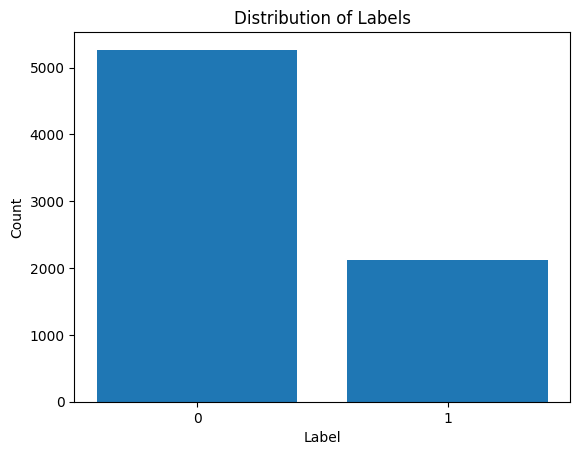

In [21]:
label_counts = train_df['Label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(label_counts.index)
plt.title('Distribution of Labels')
plt.show()